# Hito 1: Ofertas laborales en EEUU 2021
Loreto Palma, Catalina Rojas, Maximiliano Jorquera, Gabriela Mora, Bastián Pezoa

Octubre 2021

# 1. Introducción

En el presente informe se expondrá la motivación del grupo por elegir este set de datos, los datos escogidos y su exploración. Los datos corresponden a la recopilación de ofertas de trabajos en Estados Unidos durante el año 2021, que incluye información sobre las ofertas laborales y distintos atributos que la componen.

Se hizo una exploración de datos para ver los primeros rasgos del dataset, lograr entenderlos de mejor manera, conocer en profundidad la base de datos, tener conocimientos de las características y atributos con los que se iban a trabajar y hacer las transformaciones necesarias para poder trabajar con ellos y obtener la información que se quiere buscar.

La motivación nace a raíz de lo cerca que tenemos el mundo laboral, que actualmente está sufriendo distintas modificaciones y se va adaptando rápidamente a las necesidades de la sociedad, es por eso que como grupo nos interesa mucho tener algún conocimiento sobre cuales son las tendencias actuales, qué es lo que se está buscando y cómo están siendo remuneradas y valoradas distintas habilidades. 

Se escogió un dataset de Estados Unidos, ya que siempre se ha visto como un país que ofrece buenas oportunidades laborales y uno de los destinos favoritos a la hora de desarrollarse en el ámbito profesional, además, actualmente vivimos en un mundo globalizado, en donde tener una experiencia internacional impulsa de gran manera tanto el desarrollo profesional como el personal. Con el paso del tiempo, crece el número de personas que están trabajando o estudiando en un país distinto al de origen, por lo que tener la oportunidad de hacer este análisis es fundamental para descubrir *insights* y poder tomar decisiones futuras.

# 2. Exploración de datos

El dataset con el que se trabajará fue obtenido de Kaggle. Los datos recopilados en este dataset corresponden a ofertas de trabajo posteadas en diversas páginas de búsqueda de empleo en Estados Unidos.

Importamos las librerias y el dataset:

In [1]:
#standard import form used
import pandas as pd 
import numpy as np

In [2]:
# Importamos el dataset
best_jobsUS_df = pd.read_csv(r"C:\Users\basti\Desktop\DataSet\DE_R\Best_Jobs.csv", sep=',')
best_jobsUS_df = best_jobsUS_df.rename(columns={"_id": "id", "Column1": "wage_type"})
best_jobsUS_df.index = pd.DatetimeIndex(best_jobsUS_df["posted_at"])
best_jobsUS_df.head()

,salary,wage_type,education,crawled_at,description,title,skills,country,locality,posted_at,region,experience,employment_type,company,str_salary,reported_salary,normalized
posted_at,,,,,,,,,,,,,,,,,
2021-04-21 16:20:00,22,hour,Bachelor's Degree,5/5/2021 3:01,To implement the Head Start Performance Standa...,Head Start Teacher,Emergency Handling,US,Rochester,21-04-2021 16:20,NY,1 to 2 years experience.,FULL_TIME,"Action for a Better Community, Inc.",False,22.0,45760.0
2021-04-16 00:49:00,26,hour,Graduate Degree,5/5/2021 3:01,You have the magic. We have the students.Start...,Teacher of English for Online Groups!,"Vocabularies, Grammars, Teaching, Lesson Plann...",US,Atlanta,16-04-2021 0:49,GA,No experience required.,PART_TIME,Magic Ears,False,26.0,54080.0
2021-04-29 09:59:00,125000,year,Bachelor's Degree,5/5/2021 3:01,We are looking for a CRM developer to join our...,CRM / PHP Developer,"PHP (Scripting Language), Debugging, Web Servi...",US,Duluth,29-04-2021 9:59,GA,At least 5 years experience.,FULL_TIME,ExecuSource,False,125000.0,125000.0
2021-04-18 21:05:00,not_reported,not_reported,High School,5/5/2021 3:01,Briggs Dodge Ram Fiat is looking for Entry Lev...,Automotive Service Advisor / Driver,"Driving, Service Delivery, Customer Service, A...",US,Topeka,18-04-2021 21:05,KS,No experience required.,FULL_TIME,Briggs Dodge Ram Fiat,True,0.0,0.0
2021-04-13 10:38:00,120000,year,4 Year Degree,5/5/2021 3:01,"HARLINGEN, TX- RIO GRANDE VALLEY REGION (SOUTH...",Licensed Nursing Home Administrator,"Emergency Handling, Training, Accounting, Heal...",US,Harlingen,13-04-2021 10:38,TX,At least 3 years experience.,FULL_TIME,Regency Integrated Health Services,False,120000.0,120000.0


## 2.1 Limpieza de datos

Atributos y que representan:

<ul>
    <li>salary = Salario en dolares
    <li>wage_type = Tipo de salario declarado. Salario por hora o por año.
    <li>education = Grado de educación requerido para postular al trabajo
    <li>crawled_at = Fecha en que el dato fue recopilado
    <li>description = Descripción de la oferta de trabajo
    <li>title = Titulo del cargo o trabajo
    <li>skills = Habilidades deseadas para desempeñar el cargo
    <li>country = País de recopilación del dato
    <li>locality = Ciudad en donde se requiere el cargo de trabajo
    <li>posted_at = Fecha en la que fue posteada la oferta de trabajo
    <li>region = Estado de la ciudad en donde se requiere el cargo de trabajo
    <li>experience = Experiencia mínima solicitada por el empleador para el trabajo
    <li>employment_type = Tipo de empleo.
    <li>company = Nombre de la compañia que realiza la oferta laboral
    <li>str_salary = Indica si la oferta de trabajo original declaraba el sueldo en tipo string o no
    <li>reported_salary = Salario declarado en la oferta de trabajo
    <li>normalized = Salario normalizado a sueldo por año     
</ul>

### Datos eliminados

El dataset contaba con 19 atributos inicialmente, de los cuales se eliminaron 7 que contenian datos que no aportaban información al análisis de estos, o que eran, más bien, datos técnicos que ayudaban con la recopilación de la información para el dataset. 

Por el lado de las filas del dataset, se eliminaron las filas que contenian datos inconsistentes en el atributo salary. Estas contenían información en lenguaje de marcado y carácteres codificados erróneamente, y no se podía inferir si eran datos numéricos o strings, por lo que se decidió borrar para el posterior análisis. También fueron eliminadas filas que contenian datos de ofertas de trabajo de otros paises, pues estás eran una cantidad mínima.

### Columna Salary

En la columna se encontraban datos en forma de str, datos numéricos en intervalos y NA, los últimos se interpretaron como salarios que no fueron declarados por las compañías y se rellenaron con el string not_reported. 

En los datos numéricos en intervalos se decidió tomar el valor máximo de los intervalos y se separaron en 2 columnas los datos de la columna salary. Una columna salary que contiene los datos originales y otra columna que contiene los valores numéricos normalizados, pasando todos los salarios a unidad de año, llamada normalized, donde los valores 0 de la columna corresponden a las filas que contienen salarios reportados con caracteres del abecedario en la columna salary.




## 2.2 Estadísticas

Para tener una visión general inicial sobre los datos se realizó un análisis simple de estos, de modo de poder ver la dimensión del dataset, qué tipo de datos contienen los atributos, cantidad de nulos por atributo, conteo de valores por atributo (que tanto se repiten ciertos valores en estos), cantidad de valores únicos en los atributos, entre otros:

Dimensiones del dataset:

In [3]:
# (filas, atributos) del dataframe
best_jobsUS_df.shape

(10467, 17)

Tipos de datos en los atributos:

In [4]:
# Tipo de dato de los valores almacenados en los atributos
best_jobsUS_df.dtypes

salary              object
wage_type           object
education           object
crawled_at          object
description         object
title               object
skills              object
country             object
locality            object
posted_at           object
region              object
experience          object
employment_type     object
company             object
str_salary            bool
reported_salary    float64
normalized         float64
dtype: object

Información general sobre el dataframe:

In [5]:
# Conteo de valores no nulos por atributo, tipo de dato por atributo, uso de memoria del dataframe
best_jobsUS_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10467 entries, 2021-04-21 16:20:00 to 2021-04-28 09:13:00
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   salary           10467 non-null  object 
 1   wage_type        10467 non-null  object 
 2   education        6139 non-null   object 
 3   crawled_at       10467 non-null  object 
 4   description      10466 non-null  object 
 5   title            10467 non-null  object 
 6   skills           9739 non-null   object 
 7   country          10467 non-null  object 
 8   locality         10445 non-null  object 
 9   posted_at        10459 non-null  object 
 10  region           10459 non-null  object 
 11  experience       5641 non-null   object 
 12  employment_type  10459 non-null  object 
 13  company          10459 non-null  object 
 14  str_salary       10467 non-null  bool   
 15  reported_salary  10464 non-null  float64
 16  normalized       10464 

Conteo de valores nulos por atributo del dataframe:

In [6]:
# Conteo de valores nulos por atributo
best_jobsUS_df.isna().sum()

salary                0
wage_type             0
education          4328
crawled_at            0
description           1
title                 0
skills              728
country               0
locality             22
posted_at             8
region                8
experience         4826
employment_type       8
company               8
str_salary            0
reported_salary       3
normalized            3
dtype: int64

Conteo de sueldos normalizados:

In [7]:
# Conteo de sueldos normalizados a sueldo por año
best_jobsUS_df['normalized'].value_counts(dropna=False)

0.0         8519
35360.0       69
37440.0       63
83200.0       56
41600.0       53
            ... 
187200.0       1
80600.0        1
159000.0       1
171392.0       1
106392.0       1
Name: normalized, Length: 385, dtype: int64

Conteo de tipos de sueldos reportados:

In [8]:
# Conteo de tipos de sueldo
best_jobsUS_df['wage_type'].value_counts(dropna=False)

not_reported    8022
hour            1457
year             988
Name: wage_type, dtype: int64

Valores únicos en el atributo education:

In [9]:
# Valores únicos sobre atributo education
c = best_jobsUS_df.education.unique()
print(c, '\n')

["Bachelor's Degree" 'Graduate Degree' 'High School' '4 Year Degree' nan
 'Other' '2 Year Degree' "Associate's Degree" 'Ph.D.'
 'Vocational Certificate' 'None' "Master's Degree" 'Some College'
 'Doctorate'] 



Conteo de valores sobre el atributo education:

In [10]:
# Conteo de valores en education
best_jobsUS_df['education'].value_counts(dropna=False)

NaN                       4328
High School               3018
Bachelor's Degree         1025
Associate's Degree         596
4 Year Degree              521
Other                      381
Vocational Certificate     168
2 Year Degree              163
None                       111
Master's Degree             79
Graduate Degree             51
Ph.D.                       20
Doctorate                    4
Some College                 2
Name: education, dtype: int64

Valores únicos en el atributo experience:

In [11]:
# Valores unicos en experience
a = best_jobsUS_df.experience.unique()
print(a, '\n')
# Cantidad de valores unicos en experience
print("Cantidad de valores unicos: ", len(a))

['1 to 2 years experience.' 'No experience required.'
 'At least 5 years experience.' 'At least 3 years experience.'
 'At least 2 years experience.' nan '5 to 9 years experience.'
 'At least 1 year experience.' 'At least 4 years experience.'
 'At least 7 years experience.' '1 to 10 years experience.'
 'At least 8 years experience.' 'Up to 2 years experience.'
 'At least 15 years experience.' 'At least 12 years experience.'
 '3 to 5 years experience.' '3 to 15 years experience.'
 '5 to 7 years experience.' 'Up to 5 years experience.'
 '2 to 3 years experience.' '4 to 6 years experience.'
 '3 to 4 years experience.' '2 to 5 years experience.'
 'At least 10 years experience.' '5 to 8 years experience.'
 '1 to 3 years experience.' '1 to 5 years experience.'
 'Up to 3 years experience.' 'Up to 1 year experience.'
 '2 to 15 years experience.' '2 to 4 years experience.'
 'Up to 15 years experience.' '2 to 7 years experience.'
 '8 to 15 years experience.' '1 to 4 years experience.'
 '3 to 10 y

Conteo de valores sobre el atributo experience:

In [12]:
# Conteo de valores en experience
best_jobsUS_df['experience'].value_counts(dropna=False)

NaN                              4826
No experience required.          1272
At least 1 year experience.      1177
At least 2 years experience.      777
At least 5 years experience.      650
                                 ... 
10 to 12 years experience.          1
At least 14 years experience.       1
5 to 9 years experience.            1
9 to 10 years experience.           1
2 to 14 years experience.           1
Name: experience, Length: 76, dtype: int64

Valores únicos en el atributo region:

In [13]:
# Valores unicos en region
unique_region = best_jobsUS_df.region.unique()
print(unique_region, '\n')
print("Cantidad de valores unicos: ", len(unique_region))

['NY' 'GA' 'KS' 'TX' 'NC' 'IL' 'WA' 'CT' 'PA' 'MO' 'CA' 'CO' 'OR' 'AZ'
 'MN' 'MI' 'FL' 'IN' 'NH' 'MD' 'OH' 'SC' 'LA' 'VA' 'ND' 'WV' 'NV' 'WI'
 'OK' 'AL' 'NJ' 'MA' 'SD' 'AR' 'IA' 'NM' 'ID' 'MS' 'MT' 'TN' 'UT' 'WY'
 'KY' 'ME' 'DC' 'NE' 'DE' 'RI' 'AK' 'VT' 'HI' nan] 

Cantidad de valores unicos:  52


Conteo de valores en el atributo region:

In [14]:
# Conteo sobre los valores de region
best_jobsUS_df['region'].value_counts(dropna=True)

TX    851
CA    833
FL    759
GA    554
IL    440
OH    440
PA    432
NY    399
NC    397
TN    325
NJ    312
AZ    295
WA    293
MI    284
MA    267
IN    267
MN    235
VA    234
MD    229
MO    217
WI    208
SC    168
KY    148
AL    141
OK    136
OR    122
MS    119
CT    117
CO    115
IA    113
KS    108
NM     94
NH     91
AR     83
NV     81
LA     80
UT     58
NE     53
ID     45
DC     43
WV     42
DE     34
ND     33
ME     32
SD     28
RI     24
VT     20
HI     20
MT     15
WY     13
AK     12
Name: region, dtype: int64

Se crean dos columnas con los valores de los salarios anuales y por hora, en donde los valores que no están disponibles están como nulos, para facilitar el cálculo de promedios.

- *yearly_salary*: salario obtenido en un año en USD.
- *hourly_salary*: salario obtenido por hora en USD.

Para esta normalización, se consideraron 40 horas de trabajo semanales, en 52 semanas por año. 

#### Función para normalizar los sueldos a un valor anual

In [15]:
def salary_to_yearly(salary, wage_type):
  """
  Convierte los sueldos a un valor de sueldo por año.
  """
  if "year" in wage_type.lower():
    return float(salary)
  elif ("not_reported" not in wage_type.lower()) and ("hour" in wage_type.lower() or "hr" in wage_type.lower()):
    return float(salary)*40*52
  elif "week" in wage_type.lower():
    return float(salary)*52

In [16]:
best_jobsUS_df['yearly_salary'] = best_jobsUS_df.apply(lambda x: 
                                                   salary_to_yearly(salary=x['reported_salary'], wage_type=x['wage_type']), axis=1)

#### Función para normalizar los sueldos a un valor por hora

In [17]:
def salary_to_hourly(salary, wage_type):
  """
  Convierte los sueldos a un valor de sueldo por hora.
  """
  if "year" in wage_type.lower():
    return float(salary)/(40*52)
  elif ("not_reported" not in wage_type.lower()) and ("hour" in wage_type.lower() or "hr" in wage_type.lower()):
    return float(salary)
  elif "week" in wage_type.lower():
    return float(salary)/40

In [18]:
best_jobsUS_df['hourly_salary'] = best_jobsUS_df.apply(lambda x: 
                                                   salary_to_hourly(salary=x['reported_salary'], wage_type=x['wage_type']), axis=1)

## 2.3 Atributo de mayor interés

Para hallar respuestas a las preguntas que se presentan, es de crucial importancia conocer la naturaleza de la varible salario. Al momento de hacer la limpieza de datos y la exploración, se encontraron 2 formas de representar los salarios de los puestos de trabajos:

1.   Declaran sueldo en hora o en año
2.   No declaran sueldo

Con el objetivo de facilitar el trabajo de la variable salario, es que se decidió separar el atributo en 2. Uno que mantuviera la naturaleza de la variable llamada salary y otra llamada normalized, que contiene la variable salario estandarizada a sueldo por año. En el último atributo mencionado, cuando la variable toma el valor 0 corresponde a casos donde el anuncio no declaraba sueldo. La distrubución de estas 2 formas de representar el sueldo se ve de la siguiente manera:



In [19]:
#Grafico de frecuencia entre trabajos que declaran salario y los que no

salario=best_jobsUS_df['salary']
declaran=best_jobsUS_df['salary']!=0

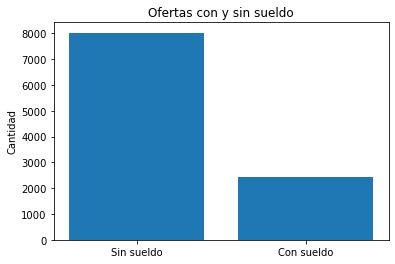

In [20]:
import matplotlib.pyplot as plt

df_notnull = best_jobsUS_df[best_jobsUS_df['yearly_salary'].notnull()]
notnull_values = df_notnull.shape[0]
null_values = best_jobsUS_df.shape[0] - notnull_values

x = ["Sin sueldo", "Con sueldo"]
y = [null_values, notnull_values] 
plt.title("Ofertas con y sin sueldo")
plt.ylabel("Cantidad")
plt.bar(x, y)
plt.show()

Por otra parte, la distribución de los sueldos de los empleos que lo declaran tiene la siguiente forma. La distribución de sueldo se ve muy dispersa al ser gráficada con el sueldo estandarizado por año, por lo que se prefirio utilizar la estandarización en hora:

In [21]:
salario=best_jobsUS_df['salary']

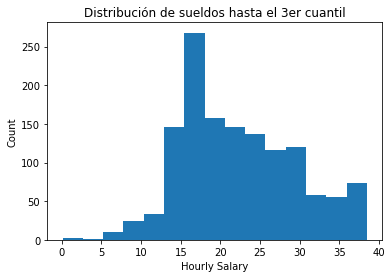

In [22]:
quantil = np.quantile(df_notnull['hourly_salary'], 0.75)
plt.hist(df_notnull['hourly_salary'], bins = 15, range = (0.1, quantil))
plt.xlabel("Hourly Salary")
plt.ylabel("Count")
plt.title("Distribución de sueldos hasta el 3er cuantil")
plt.show()

## 2.4 Palabras más frecuentes en los atributos


In [23]:
# Funcion que contea las n palabras más frecuentes dentro de un atributo L

from collections import Counter

def count_words(L, n):
    words = []
    for text in list(L): 
        for word in str(text).split():
            words.append(word)

    counter_words = Counter(words)
    pairs = counter_words.most_common(n)
    return pairs

Se calcularon las palabras más frecuentes en los atributos title, description y skills para tener un panorama de qué palabras deben ser filtradas a lo largo de la exploración, pues no aportan con información a esta:

1500 palabras más utilizadas en title:

In [24]:
# 1500 palabras más frecuentes el atributo title
words_title = count_words(best_jobsUS_df["title"], 1500)
# Mostramos las primeras 25 para evitar extension
words_title[:25]

[('-', 3302),
 ('Sales', 735),
 ('Warehouse', 629),
 ('Manager', 627),
 ('Earn', 503),
 ('to', 498),
 ('Truck', 495),
 ('Nurse', 490),
 ('Assistant', 478),
 ('up', 466),
 ('Service', 464),
 ('Representative', 451),
 ('Specialist', 431),
 ('Driver', 411),
 ('Technician', 404),
 ('Associate', 403),
 ('Home', 396),
 ('CDL', 370),
 ('A', 348),
 ('TRAINING', 343),
 ('Customer', 341),
 ('Registered', 323),
 ('Amazon', 294),
 ('Engineer', 291),
 ('&', 288)]

2500 palabras más utilizadas en description:

In [25]:
# 2500 palabras más frecuentes el atributo description
words_description = count_words(best_jobsUS_df["description"], 2500)
# Mostramos las primeras 25 para evitar extension
words_description[:25]

[('and', 208624),
 ('to', 130772),
 ('the', 99187),
 ('of', 91024),
 ('a', 69799),
 ('in', 63569),
 ('with', 52435),
 ('for', 51415),
 ('is', 32692),
 ('or', 31035),
 ('as', 24630),
 ('you', 24395),
 ('our', 24152),
 ('on', 23412),
 ('be', 21121),
 ('are', 20198),
 ('your', 18422),
 ('an', 18043),
 ('work', 17608),
 ('will', 16243),
 ('all', 16133),
 ('that', 15381),
 ('at', 13121),
 ('by', 12657),
 ('experience', 12420)]

3000 palabras más utilizadas en skills:

In [26]:
# 3000 palabras más frecuentes el atributo skills
words_skills = count_words(best_jobsUS_df["skills"], 3000)
# Mostramos las primeras 25 para evitar extension
words_skills[:25]

[('Management,', 3905),
 ('Customer', 2855),
 ('And', 2766),
 ('Communication,', 2509),
 ('Scheduling,', 2210),
 ('Microsoft', 1990),
 ('Sales,', 1841),
 ('Service,', 1710),
 ('Health', 1696),
 ('Training,', 1200),
 ('Hardworking', 1198),
 ('Dedicated,', 1182),
 ('Care,', 1151),
 ('Information', 1141),
 ('Problem', 1074),
 ('Complex', 1063),
 ('Life', 1061),
 ('Solving,', 1037),
 ('To', 1017),
 ('Business', 1001),
 ('Attention', 941),
 ('Data', 900),
 ('Testing,', 896),
 ('Operations,', 871),
 ('Detail,', 862)]

Con un panorama claro sobre que palabras eliminar, se procede a crear una nueva función que nos muestre las palabras más frecuentes en cada atributo, con el filtro aplicado. Para esto, necesitaremos pasar estas listas a diccionarios, para hacer más eficiente la eliminacion de las ocurrencias:

In [27]:
dt_title = dict(words_title)
dt_description = dict(words_description)
dt_skills = dict(words_skills)

In [28]:
filter = ['The', 'at', 'up', '-', '|', 'Up', 'Daily!', 'of', 'or', 'to', '/', \
         'in', 'I', '16.80/hr', '2nd', 'In', '13', 'To', 'for', '1st', \
         '(Multiple', '--', '(Night', '70k', 'OR', '(Overnight', \
         'Openings!)', 'On', '(Benefits', '18.80/hr', 'Day', 'III', \
         'Rep', '18.95/hr', 'Included)', 'on', 'Sr', '3rd', '(Hiring', \
         'Needed', 'Need', 'Per', 'time', '19.00/hr', '19.65/hr', 'New', \
         '20.30/hr', '12', 'Jobs', '18.25/hr', '17.25/hr', 'At', 'No', \
         'start', 'with', 'Pay', '1', '20.30/hr', '+', '12', '18.25/hr', \
         'and', '&', 'A', 'FROM', 'Week', '4', 'BONUS!', 'advisor/', 'Hiring!' \
         'ON', 'BONUS!', '"Work', 'Hard,', 'IN', '14.75', '15.25/hour', 'Mon-Thur' \
         '9:30-6:00pm', '10k', 'And', 'To', 'nan', 'Of', 'End', 'New', \
         'and', 'to', 'the', 'of', 'a', 'for', 'with', 'is', 'or', ':', \
         '&amp', 'come', 'minimum', 'miles', 'job.', 'end', 'Are', 'days,' \
         'whole', 'Use', 'upon', 'By', 'X', 'six', 'give', 'IT', 'you.', \
         'It', '[', ']', 'as', 'you', 'our', 'be', 'are', 'your', 'an', \
         'all', 'by', 'that', 'We', 'we', 'have', '•', 'from', 'this', \
         'their', 'can', 'will', 'not', 'Our', 'This', 'who', '–', 'other', 'more', \
          'work', 'working', 'years']

# Elimina la llave i del diccionario D
def count_words_clean(D):
  for i in filter:
    D.pop(i, None)
  return D
  

Ahora, podemos ver las palabras más frecuentes de mejor manera:

In [29]:
most_frec_title = count_words_clean(dt_title)
titles = list(dt_title.items())
titles[:25]

[('Sales', 735),
 ('Warehouse', 629),
 ('Manager', 627),
 ('Earn', 503),
 ('Truck', 495),
 ('Nurse', 490),
 ('Assistant', 478),
 ('Service', 464),
 ('Representative', 451),
 ('Specialist', 431),
 ('Driver', 411),
 ('Technician', 404),
 ('Associate', 403),
 ('Home', 396),
 ('CDL', 370),
 ('TRAINING', 343),
 ('Customer', 341),
 ('Registered', 323),
 ('Amazon', 294),
 ('Engineer', 291),
 ('Shifts', 275),
 ('Team', 256),
 ('Operator', 250),
 ('Retail', 241),
 ('Available)', 241)]

In [30]:
most_frec_desc = count_words_clean(dt_description)
desc = list(dt_description.items())
desc[:25]

[('experience', 12420),
 ('customer', 10006),
 ('team', 8780),
 ('care', 7489),
 ('job', 7006),
 ('Link', 6825),
 ('Removed', 6813),
 ('skills', 6577),
 ('including', 6570),
 ('provide', 6528),
 ('business', 5982),
 ('service', 5797),
 ('company', 5736),
 ('support', 5333),
 ('opportunity', 5300),
 ('training', 5292),
 ('new', 5273),
 ('health', 5108),
 ('sales', 5091),
 ('ability', 5020),
 ('required', 4927),
 ('environment', 4607),
 ('career', 4604),
 ('within', 4568),
 ('may', 4526)]

In [31]:
most_frec_skills = count_words_clean(dt_skills)
skills = list(dt_skills.items())
skills[:25]

[('Management,', 3905),
 ('Customer', 2855),
 ('Communication,', 2509),
 ('Scheduling,', 2210),
 ('Microsoft', 1990),
 ('Sales,', 1841),
 ('Service,', 1710),
 ('Health', 1696),
 ('Training,', 1200),
 ('Hardworking', 1198),
 ('Dedicated,', 1182),
 ('Care,', 1151),
 ('Information', 1141),
 ('Problem', 1074),
 ('Complex', 1063),
 ('Life', 1061),
 ('Solving,', 1037),
 ('Business', 1001),
 ('Attention', 941),
 ('Data', 900),
 ('Testing,', 896),
 ('Operations,', 871),
 ('Detail,', 862),
 ('Development,', 859),
 ('Self', 853)]

Con esto, se grafican las 15 palabras más frecuentes de cada atributo:

* Gráfico de barras para el atributo *title*:

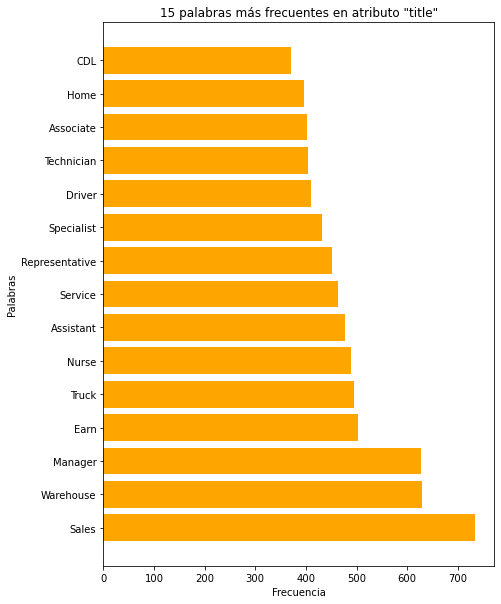

In [32]:
plt.figure(figsize=(7,10))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
x = [titles[i][0] for i in range(0,15)]
y = [titles[i][1] for i in range(0,15)]
g= plt.barh(x, y, color='orange')
plt.title('15 palabras más frecuentes en atributo "title"')
plt.show()

Con esto, se logra ver claramente que durante el año 2021 las ofertas laborales dominantes han sido en las áreas de venta, gerencia y almacenamiento/bodegaje. Esto, probablemente debido al aumento, o boom, del e-commerce durante la pandemía que, hasta la fecha, sigue en curso.

* Gráfico de barras para el atributo *description*:

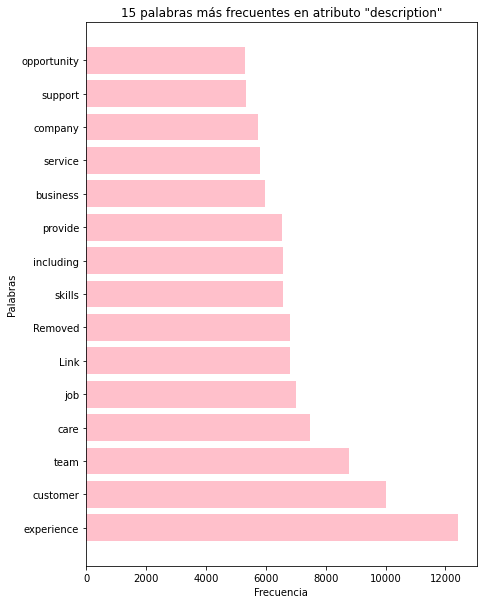

In [33]:
plt.figure(figsize=(7,10))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
x = [desc[i][0] for i in range(0,15)]
y = [desc[i][1] for i in range(0,15)]
g= plt.barh(x, y, color='pink')
plt.title('15 palabras más frecuentes en atributo "description"')
plt.show()

Dentro de las descripciones de los trabajos, se ve un uso muy frecuente de la palabra experiencia, cliente y equipo.

* Gráfico de barras para el atributo *skills*:

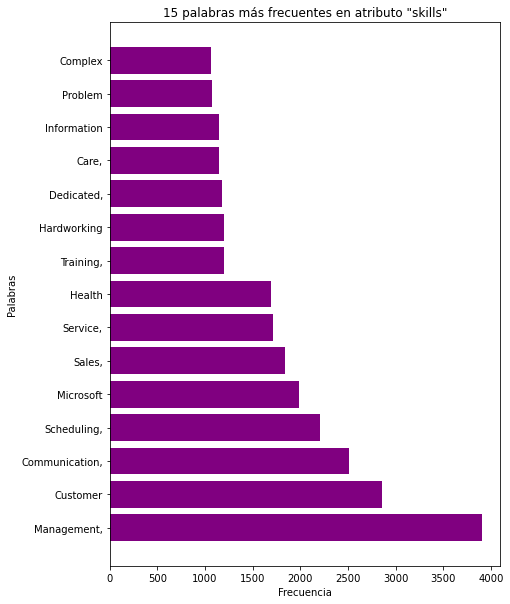

In [34]:
plt.figure(figsize=(7,10))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
x = [skills[i][0] for i in range(0,15)]
y = [skills[i][1] for i in range(0,15)]
g= plt.barh(x, y, color='purple')
plt.title('15 palabras más frecuentes en atributo "skills"')
plt.show()

A pesar de verse una clara dominancia de la *skill* de administración, las ofertas tienen un gran interés también en la comunicación y planificación, habilidades muy ligadas con la organización.

## 2.5 Correlación entre variables


El objetivo de esta sección de exploración, es encontrar correlaciones entre la variable normalized (salarios normalizados) y otras variables de nuestro interés. Esto con el propósito de estudiar con qué variables se relaciona el salario y saber si coincide con las variables que se pensaron.

Lo primero que se quería observar, era si el largo (cantidad de palabras) de la descripción estaba relacionado con el salario, para esto se creó la variable "word_count" que contaba la cantidad de palabras que tenía la descripción.

In [35]:
best_jobsUS_df["word_count"] = best_jobsUS_df["description"].str.split().str.len()

In [36]:
best_jobsUS_df.sample(10)

,salary,wage_type,education,crawled_at,description,title,skills,country,locality,posted_at,region,experience,employment_type,company,str_salary,reported_salary,normalized,yearly_salary,hourly_salary,word_count
posted_at,,,,,,,,,,,,,,,,,,,,
2021-04-14 03:24:00,not_reported,not_reported,High School,5/5/2021 3:14,Come work with us at Spencer's &amp; Spirit Ha...,District Sales Manager,"Retail Management, Recruitment, Customer Servi...",US,Brooklyn,14-04-2021 3:24,NY,Up to 5 years experience.,FULL_TIME,Spirit Halloween,True,0.0,0.0,NaN,NaN,400.0
2021-10-04 22:12:00,not_reported,not_reported,Associate's Degree,5/5/2021 3:14,How would you like to work in a place where yo...,Licensed Practical Nurse (LPN) - Oncology Floa...,"Licensed Practical Nurse, Nursing, Registered ...",US,Marietta,10/4/2021 22:12,GA,No experience required.,FULL_TIME,WellStar Health System,True,0.0,0.0,NaN,NaN,330.0
2021-04-29 06:47:00,45000,year,NaN,5/5/2021 3:25,Ref ID: 03230 [ Phone number blocked ] Classif...,Collections Specialist,"Accounts Receivable, Collections, Medical Bill...",US,Greenville,29-04-2021 6:47,SC,At least 2 years experience.,FULL_TIME,Robert Half,False,45000.0,45000.0,45000.0,21.634615,248.0
2021-04-23 12:37:00,240000,year,NaN,5/5/2021 3:08,Ref ID: 00410 [ Phone number blocked ] Classif...,Sr. Corporate Counsel,"Mergers And Acquisitions, Corporate Security, ...",US,Redwood City,23-04-2021 12:37,CA,At least 5 years experience.,FULL_TIME,Robert Half,False,240000.0,240000.0,240000.0,115.384615,570.0
2021-04-26 11:39:00,not_reported,not_reported,Bachelor's Degree,5/5/2021 3:03,Primary Purpose: Provide expertise and suppor...,Product Analyst I,"Stress Management, Economics, Finance, Time Ma...",US,Chicago,26-04-2021 11:39,IL,NaN,FULL_TIME,National General Insurance,True,0.0,0.0,NaN,NaN,273.0
2021-04-27 12:38:00,not_reported,not_reported,NaN,5/5/2021 3:15,Retail Office AssociatesPart-Time and Full Tim...,Retail Office Associate,"Sales, Interpersonal Skills, Retailing, Active...",US,North Canton,27-04-2021 12:38,OH,NaN,FULL_TIME,Bob's Discount Furniture,True,0.0,0.0,NaN,NaN,540.0
2021-04-14 14:20:00,not_reported,not_reported,High School,5/5/2021 3:27,Dental Assistant (General Dentistry Practice) ...,Dental Assistant (General Dentistry Practice),"Instructions, Dental Surgery, Hygiene, Infecti...",US,Barefoot Beach,14-04-2021 14:20,FL,NaN,FULL_TIME,Aspen Dental,True,0.0,0.0,NaN,NaN,255.0
2021-07-04 20:22:00,not_reported,not_reported,High School,5/5/2021 3:02,Current Compassus Colleagues: Please apply via...,Hospice Aide,"Registered Nurse Certified, Scheduling, Skin C...",US,Billings,7/4/2021 20:22,MT,NaN,FULL_TIME,Compassus,True,0.0,0.0,NaN,NaN,407.0
2021-04-21 11:18:00,not_reported,not_reported,Graduate Degree,5/5/2021 3:17,:Improve the performance of critical forecasti...,Quantitative Finance Analyst,"Storage (Warehousing), Scale (Map), Mathematic...",US,Jersey City,21-04-2021 11:18,NJ,At least 2 years experience.,FULL_TIME,Bank of America,True,0.0,0.0,NaN,NaN,253.0


Luego se creó un dataframe en donde estaban las variables del salario normalizado: "normalized" y la variable recién creada "word_count"

In [37]:
df_corr = pd.DataFrame(best_jobsUS_df, columns=['normalized', 'word_count'])

In [38]:
df_corr.sample(10)

,normalized,word_count
posted_at,,
2021-04-27 20:38:00,0.0,189.0
2021-04-30 21:01:00,0.0,445.0
2021-07-04 14:14:00,0.0,272.0
2021-04-16 04:34:00,0.0,679.0
2021-02-05 14:40:00,95680.0,91.0
2021-04-15 09:57:00,0.0,516.0
2021-02-05 22:20:00,0.0,506.0
2021-04-16 12:03:00,0.0,473.0
2021-01-05 09:12:00,0.0,360.0


Finalmente, se calculó el coeficiente de correlación entre ambas variables

In [39]:
df_corr.corr()

,normalized,word_count
normalized,1.000000,-0.096618
word_count,-0.096618,1.000000


De los resultados se puede apreciar que el valor obtenido es muy cercano a 0, esto quiere decir que ambas variables no están correlacionadas, por lo que el largo de la descripción no está relacionado con el salario.

Otras variables que eran de interés eran: locality (ciudad de donde es la oferta), title (título del cargo) y education (nivel de educación requerido). Por lo que se estudió la correlación en R para ver si efectivamente estas variables estaban relacionadas con el salario.

Para obtener los coeficientes de correlación, en R se utilizó el comando corRatio de la librería DiscriMiner, este comando permite calcular coeficientes de correlación entre una variable numérica con una categórica, con el siguiente código y arrojando los siguientes resultados:

### corRatio

corRatio(Best_Jobs\$normalized, Best_Jobs\$locality) \\
corRatio(Best_Jobs\$normalized, Best_Jobs\$title) \\
corRatio(Best_Jobs\$normalized, Best_Jobs\$education) 

0.2498862 \\
0.812064 \\
0.1029589

Del resultado se puede apreciar que las variables locality y education están poco correlacionadas con el salario, mientras que title está muy correlacionado. Por lo que se concluye que el salario tiene mucha relación con el título del cargo con el que se postea la oferta.

## 2.6 Exploración sobre grado de educación, regiones y horas


En esta sección se quiere obtener cuáles eran los requisitos de educación más recurrentes en las ofertas de trabajo, las ciudades/estados con más ofertas y a qué hora eran publicadas con más frecuencia.

### Educación requerida en ofertas de trabajo

In [40]:
education = best_jobsUS_df['education'].value_counts(dropna=True).rename_axis('Education').reset_index(name='Count')
education

,Education,Count
0,High School,3018
1,Bachelor's Degree,1025
2,Associate's Degree,596
3,4 Year Degree,521
4,Other,381
5,Vocational Certificate,168
6,2 Year Degree,163
7,None,111
8,Master's Degree,79
9,Graduate Degree,51


In [41]:
#Nivel de educación más y menos pedidos en las ofertas de trabajo
min_max_education = education.head(1).append(education.tail(2))
min_max_education

,Education,Count
0,High School,3018
11,Doctorate,4
12,Some College,2


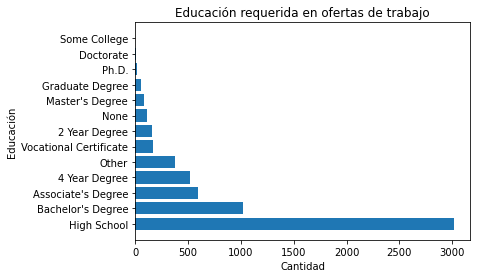

In [42]:
import matplotlib.pyplot as plt

plt.barh(education['Education'], education['Count'])
plt.xlabel('Cantidad')
plt.ylabel('Educación')
plt.title('Educación requerida en ofertas de trabajo')
plt.show()

### Cantidad de ofertas de trabajo por región

In [43]:
region = best_jobsUS_df['region'].value_counts(dropna=True).rename_axis('Region').reset_index(name='Count')
region.head(15)

,Region,Count
0,TX,851
1,CA,833
2,FL,759
3,GA,554
4,IL,440
5,OH,440
6,PA,432
7,NY,399
8,NC,397
9,TN,325


In [44]:
#Región con mayor y menor cantidad de ofertas de trabajo
min_max_region = region.head(1).append(region.tail(1))
min_max_region

,Region,Count
0,TX,851
50,AK,12


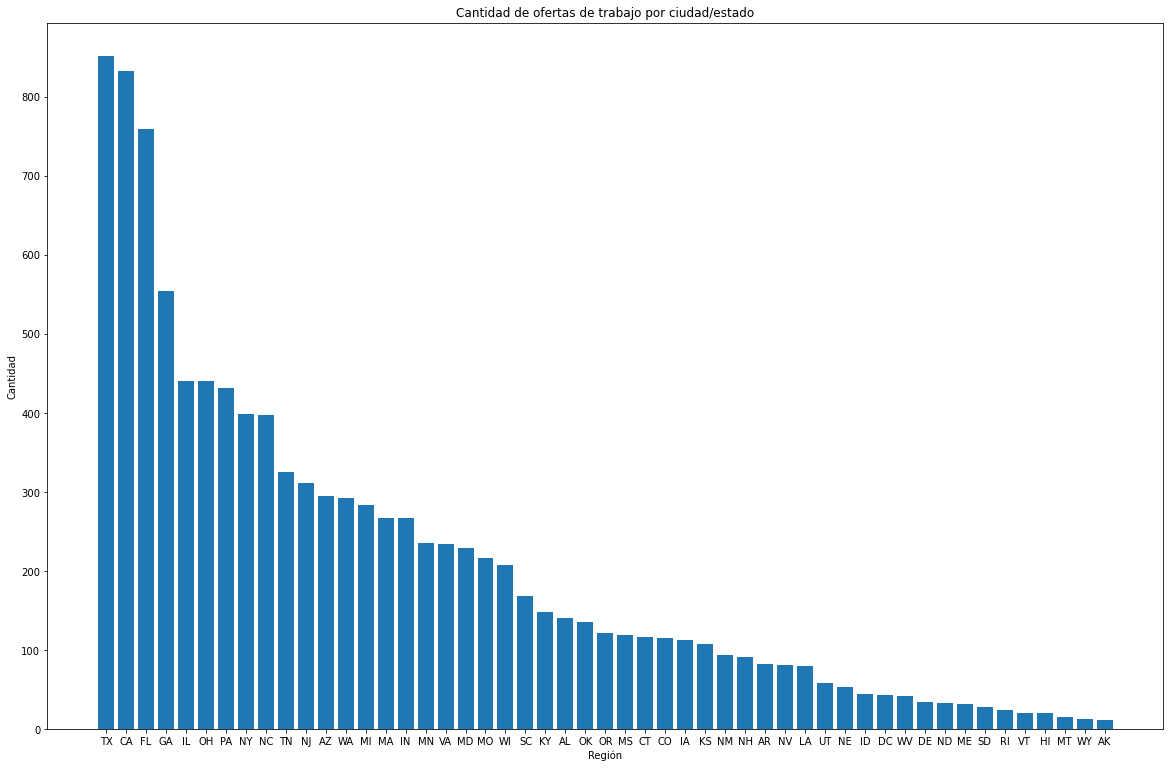

In [53]:
import matplotlib.pyplot as plt

plt.bar(region['Region'], region['Count'])
plt.rcParams["figure.figsize"] = (20, 13)
plt.ylabel('Cantidad')
plt.xlabel('Región')
plt.title('Cantidad de ofertas de trabajo por ciudad/estado')
plt.show()

### Hora de publicación

In [46]:
#Cantidad de ofertas publicadas según hora
best_jobsUS_df['posted_at'] = pd.to_datetime(best_jobsUS_df.posted_at, format='%d-%m-%Y %H:%M', errors='coerce')
hours = best_jobsUS_df['posted_at'].dt.hour.value_counts(dropna=True).rename_axis('Hour').reset_index(name='Count')
hours

,Hour,Count
0,21.0,740
1,12.0,654
2,20.0,558
3,22.0,431
4,6.0,385
5,13.0,343
6,5.0,328
7,14.0,266
8,4.0,240
9,9.0,225


In [47]:
#Horas con mayor y menor número de publicaciones de ofertas de trabajo
hours_ordered = hours.sort_values(['Count'], ascending=False)
hours_ordered_table = hours_ordered.head(1).append(hours_ordered.tail(1))
hours_ordered_table

,Hour,Count
0,21.0,740
23,18.0,21


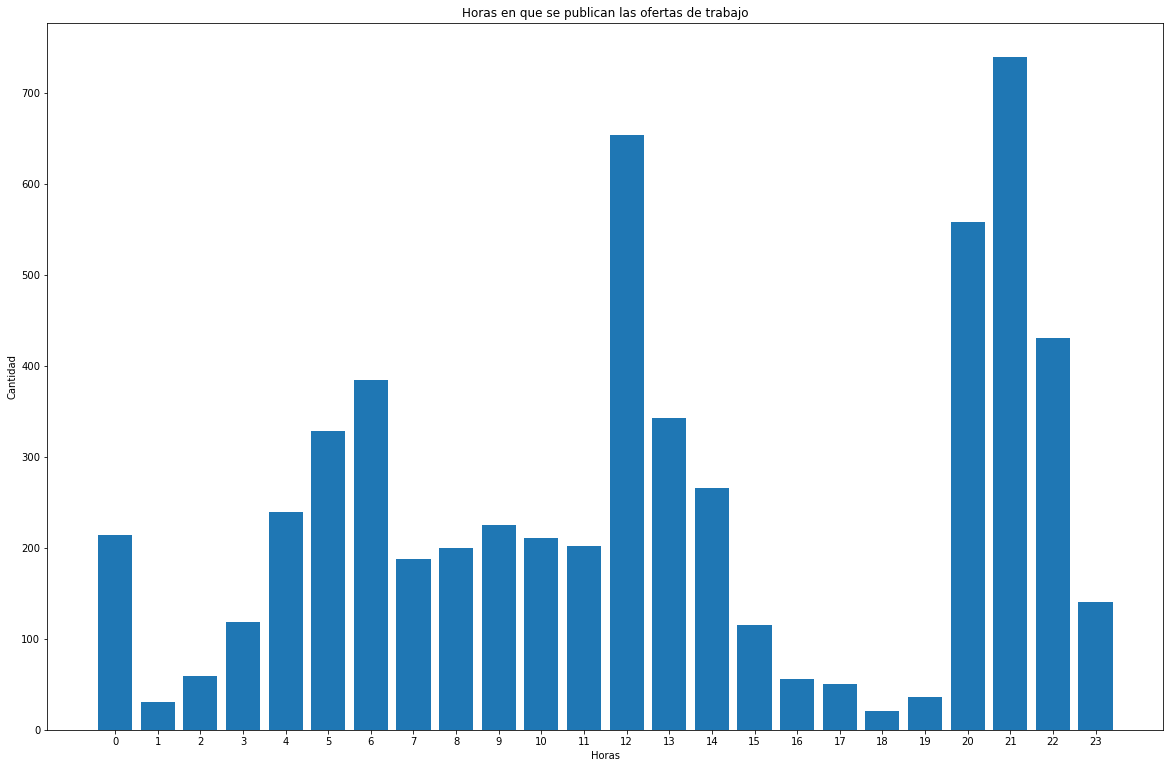

In [48]:
import matplotlib.pyplot as plt

plt.bar(hours['Hour'], hours['Count'])
plt.xticks(list(hours['Hour']))
plt.ylabel('Cantidad')
plt.xlabel('Horas')
plt.title('Horas en que se publican las ofertas de trabajo')
plt.show()

## 2.7 Sueldos según la ubicación

Considerando que tenemos la información geográfica de cada oferta de trabajo, un análisis interesante que se puede hacer es en base al sueldo promedio que se registra en cada estado. 



#### Salario promedio en los Estados Unidos

In [49]:
hour = best_jobsUS_df['hourly_salary'].mean()
print("El salario promedio/hora calculado es de: ", round(hour, 1), "USD")
year = best_jobsUS_df['yearly_salary'].mean()
print("El salario promedio/año calculado es de: ", round(year, 1), "USD")

El salario promedio/hora calculado es de:  29.3 USD
El salario promedio/año calculado es de:  60933.2 USD


En base a estos cálculos, el salario promedio anual es de 60933.2 USD, mientras el que el salario promedio por hora es de 29.3 USD.

Una vez obtenidos estos datos, pasamos al análisis de los sueldos, considerando el la ubicación geográfica de la oferta.

#### Salario promedio según el estado

En primer lugar, antes de calcular los valores promedio, calculamos cuantos datos de sueldos tenemos para cada estado. La idea es que se consideren solo aquellos estados que tengan la suficiente cantidad de datos para los promedios a mostrar. 


In [50]:
jobs_salary = best_jobsUS_df[best_jobsUS_df['yearly_salary'].notnull()]
region_count = jobs_salary.groupby(['region']).size().reset_index(name='counts')
region_count['counts'].median()

29.0

Se obtiene que la mediana para la cantidad de valores por estado es de 29, por lo que para los siguientes análisis se considerarán solo los estados que tengan más de 16 valores de salarios.



In [51]:
region_count_filtered = region_count.loc[region_count['counts'] >= 22]
best_jobs_filtered = best_jobsUS_df[best_jobsUS_df['region'].isin(list(region_count_filtered['region']))]
best_jobs_filtered = best_jobs_filtered[best_jobs_filtered['yearly_salary'].notnull()]

Una vez tenemos filtrados los datos, tanto las regiones con el conteo mínimo definido, como los salarios anuales no nulos, calculamos cual es el sueldo promedio anual por estado de USA.

In [52]:
region_mean_salary = best_jobs_filtered.groupby('region', as_index=False)['yearly_salary'].mean()
region_mean_salary.sort_values(by=['yearly_salary'], ascending=False)

,region,yearly_salary
13,MA,92410.896875
3,CO,86745.239024
10,KS,77205.038462
24,TN,72157.343284
26,VA,69354.769231
19,NJ,69002.696203
23,SC,68701.257143
12,LA,67019.200000
14,MD,66035.096774
18,NC,65054.192308


En base a este análisis, podemos observar que los 5 estados con mayor sueldo promedio anualmente son: 

- Massachusetts
- Colorado
- Kansas
- Tennessee
- Virginia

# 3. Preguntas y problemas

En base a la exploración y analísis de los datos, en conjunto con la motivación expresada, se plantean las siguientes preguntas a intentar resolver en este proyecto:

* ¿Se puede predecir el sueldo con las variables descripción de la oferta, ubicación del trabajo, área de interés, hora y skills? 

* Si tengo un conjunto de skills, ¿qué skill podría desarrollar para optar a un mejor sueldo?

* ¿Existe alguna relación entre la localización del trabajo y el rol que se está buscando en la oferta?

# 4. Contribuciones

* Maximiliano Jorquera: Estuvo a cargo de la introducción y la correlación entre variables.
* Catalina Rojas: Estuvo a cargo de la exploracion sobre grado de educación, regiones y horas.
* Loreto Palma: Estuvo a cargo del análisis de sueldos según la ubicación y de la normalización de los valores en el atributo salary.
* Gabriela Mora: Estuvo a cargo de la limpieza de datos y del apartado de atributos con mayor intéres.
* Bastián Pezoa: Estuvo a cargo del apartado de Estadísticas y palabras más frecuentes en los atributos.

Y entre todos, se discutieron las preguntas y problemas, y se redactó el presente informe.